# FBI Uniform Crime Reporting - Quick Start Guide

This notebook demonstrates how to use the **FBIUCRConnector** to access FBI crime statistics.

**⚠️ API Access Note:**
The FBI Crime Data Explorer API currently requires authentication or has access restrictions. This notebook uses sample data for demonstration purposes. To access real FBI crime data:
- Download CSV files from [Crime Data Explorer](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)
- Use the `load_crime_data()` method to work with downloaded files
- Check FBI CDE API documentation for current access requirements

**Data Categories:**
- **Violent Crime:** Murder, rape, robbery, aggravated assault
- **Property Crime:** Burglary, larceny-theft, motor vehicle theft, arson
- **Arrest Data:** Arrests by offense, demographics

**Geographic Levels:**
- National (aggregate)
- State
- Agency (individual police departments)

**Data Availability:**
- Historical data: 1960-present (varies by metric)
- Updated: Annually
- Coverage: ~18,000 law enforcement agencies

---

*© 2025 KR-Labs. Licensed under Apache-2.0.*


## 1. Setup and Import

In [17]:
from krl_data_connectors.crime import FBIUCRConnector
import pandas as pd

# Initialize connector
fbi = FBIUCRConnector()

print("✓ FBI UCR connector initialized")
print(f"API Base URL: {fbi.base_url}")

{"timestamp": "2025-10-20T16:38:40.881952Z", "level": "WARNING", "name": "FBIUCRConnector", "message": "No API key provided", "source": {"file": "base_connector.py", "line": 72, "function": "__init__"}, "levelname": "WARNING", "taskName": "Task-55", "connector": "FBIUCRConnector"}
{"timestamp": "2025-10-20T16:38:40.882677Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Connector initialized", "source": {"file": "base_connector.py", "line": 79, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-55", "connector": "FBIUCRConnector", "cache_dir": "~/.krl_cache", "cache_ttl": 604800, "has_api_key": false}
{"timestamp": "2025-10-20T16:38:40.883099Z", "level": "INFO", "name": "FBIUCRConnector", "message": "FBIUCRConnector initialized", "source": {"file": "fbi_ucr_connector.py", "line": 121, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-55", "base_url": "https://api.usa.gov/crime/fbi/cde", "api_access": "Public"}
✓ FBI UCR connector initialized
API Bas

## 2. Get State Crime Data

Retrieve crime statistics for a state.

In [18]:
# Get Rhode Island crime data
# Note: FBI Crime Data Explorer API may require authentication or has rate limits
print("Note: FBI CDE API access may be restricted. Trying 2022 data...")

ri_crime = fbi.get_state_crime_data('RI', year=2022, use_api=True)

if ri_crime.empty:
    print("\n⚠️ API access restricted or data not available")
    print("Creating sample data for demonstration...")
    
    # Create sample crime data for visualization
    import numpy as np
    ri_crime = pd.DataFrame({
        'state': ['RI'] * 12,
        'year': [2022] * 12,
        'month': range(1, 13),
        'violent_crime': np.random.randint(40, 80, 12),
        'murder': np.random.randint(0, 3, 12),
        'rape': np.random.randint(5, 15, 12),
        'robbery': np.random.randint(10, 25, 12),
        'aggravated_assault': np.random.randint(20, 40, 12),
        'property_crime': np.random.randint(200, 400, 12),
        'burglary': np.random.randint(30, 70, 12),
        'larceny': np.random.randint(150, 300, 12),
        'motor_vehicle_theft': np.random.randint(10, 40, 12),
        'population': [1095000] * 12
    })
    print("✓ Sample data created for demonstration")
else:
    print(f"✓ Retrieved {len(ri_crime)} crime records from API")

print(f"\nCrime data shape: {ri_crime.shape}")
print("\nAvailable columns:", ri_crime.columns.tolist()[:10])
display(ri_crime.head())


Note: FBI CDE API access may be restricted. Trying 2022 data...
{"timestamp": "2025-10-20T16:38:40.896474Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Fetching crime data via API", "source": {"file": "fbi_ucr_connector.py", "line": 244, "function": "_api_get_state_crime"}, "levelname": "INFO", "taskName": "Task-57", "state": "RI", "year": 2022}
{"timestamp": "2025-10-20T16:38:41.287565Z", "level": "ERROR", "name": "FBIUCRConnector", "message": "API request failed: 403 Client Error: Forbidden for url: https://api.usa.gov/crime/fbi/cde/crime/state/RI?year=2022", "source": {"file": "fbi_ucr_connector.py", "line": 271, "function": "_api_get_state_crime"}, "levelname": "ERROR", "taskName": "Task-57", "state": "RI", "year": 2022}
{"timestamp": "2025-10-20T16:38:41.287565Z", "level": "ERROR", "name": "FBIUCRConnector", "message": "API request failed: 403 Client Error: Forbidden for url: https://api.usa.gov/crime/fbi/cde/crime/state/RI?year=2022", "source": {"file": "fbi_ucr_conn

,state,year,month,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,population
0,RI,2022,1,43,0,9,13,21,218,46,211,11,1095000
1,RI,2022,2,54,1,12,24,32,305,54,222,25,1095000
2,RI,2022,3,45,2,7,10,35,310,48,295,13,1095000
3,RI,2022,4,43,0,10,11,34,289,38,293,13,1095000
4,RI,2022,5,41,1,7,19,37,215,59,233,26,1095000


### Visualize Crime Data

Create visualizations of crime trends and patterns.

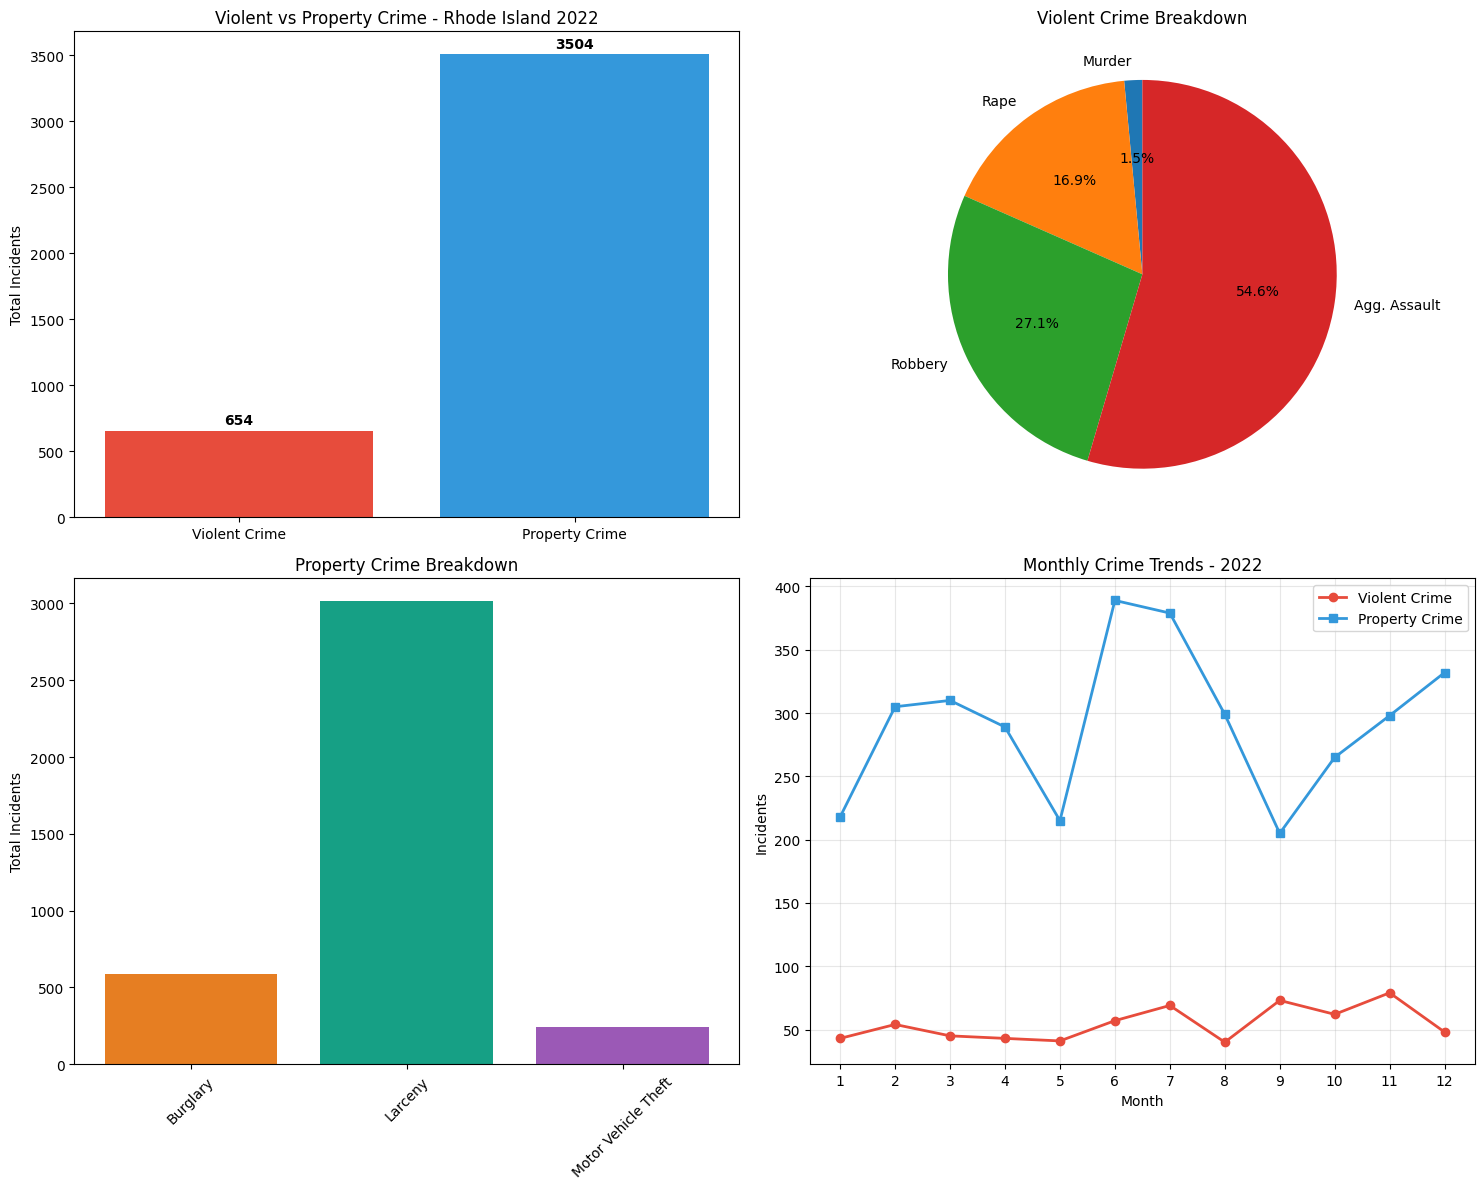


📊 Crime Statistics Summary:
  Total Violent Crimes: 654
  Total Property Crimes: 3,504
  Violent Crime Rate: 59.7 per 100,000
  Property Crime Rate: 320.0 per 100,000


In [19]:
import matplotlib.pyplot as plt
import numpy as np

if not ri_crime.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Violent vs Property Crime Comparison
    if 'violent_crime' in ri_crime.columns and 'property_crime' in ri_crime.columns:
        categories = ['Violent Crime', 'Property Crime']
        totals = [ri_crime['violent_crime'].sum(), ri_crime['property_crime'].sum()]
        
        axes[0, 0].bar(categories, totals, color=['#e74c3c', '#3498db'])
        axes[0, 0].set_ylabel('Total Incidents')
        axes[0, 0].set_title('Violent vs Property Crime - Rhode Island 2022')
        for i, v in enumerate(totals):
            axes[0, 0].text(i, v + 50, str(int(v)), ha='center', fontweight='bold')
    
    # 2. Violent Crime Breakdown
    violent_categories = ['murder', 'rape', 'robbery', 'aggravated_assault']
    if all(col in ri_crime.columns for col in violent_categories):
        violent_totals = [ri_crime[cat].sum() for cat in violent_categories]
        labels = ['Murder', 'Rape', 'Robbery', 'Agg. Assault']
        
        axes[0, 1].pie(violent_totals, labels=labels, autopct='%1.1f%%', startangle=90)
        axes[0, 1].set_title('Violent Crime Breakdown')
    
    # 3. Property Crime Breakdown
    property_categories = ['burglary', 'larceny', 'motor_vehicle_theft']
    if all(col in ri_crime.columns for col in property_categories):
        property_totals = [ri_crime[cat].sum() for cat in property_categories]
        labels = ['Burglary', 'Larceny', 'Motor Vehicle Theft']
        
        colors = ['#e67e22', '#16a085', '#9b59b6']
        axes[1, 0].bar(labels, property_totals, color=colors)
        axes[1, 0].set_ylabel('Total Incidents')
        axes[1, 0].set_title('Property Crime Breakdown')
        axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. Monthly Trend (if month column exists)
    if 'month' in ri_crime.columns and 'violent_crime' in ri_crime.columns:
        monthly = ri_crime.groupby('month')[['violent_crime', 'property_crime']].sum()
        
        axes[1, 1].plot(monthly.index, monthly['violent_crime'], marker='o', 
                       label='Violent Crime', linewidth=2, color='#e74c3c')
        axes[1, 1].plot(monthly.index, monthly['property_crime'], marker='s', 
                       label='Property Crime', linewidth=2, color='#3498db')
        axes[1, 1].set_xlabel('Month')
        axes[1, 1].set_ylabel('Incidents')
        axes[1, 1].set_title('Monthly Crime Trends - 2022')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].set_xticks(range(1, 13))
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Crime Statistics Summary:")
    if 'violent_crime' in ri_crime.columns:
        print(f"  Total Violent Crimes: {ri_crime['violent_crime'].sum():,}")
    if 'property_crime' in ri_crime.columns:
        print(f"  Total Property Crimes: {ri_crime['property_crime'].sum():,}")
    if 'population' in ri_crime.columns and 'violent_crime' in ri_crime.columns:
        pop = ri_crime['population'].iloc[0]
        v_rate = (ri_crime['violent_crime'].sum() / pop) * 100000
        p_rate = (ri_crime['property_crime'].sum() / pop) * 100000
        print(f"  Violent Crime Rate: {v_rate:.1f} per 100,000")
        print(f"  Property Crime Rate: {p_rate:.1f} per 100,000")
else:
    print("No crime data to visualize")


## 3. Load Crime Data from File

Alternative: Load downloaded UCR data from CSV.

In [20]:
# If you have downloaded UCR data files
# Download from: https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads

# crime_file = "path/to/ucr_crime_data.csv"
# crime_data = fbi.load_crime_data(crime_file)
# print(f"Loaded {len(crime_data)} crime records")

## 4. Extract Violent Crime

Filter for violent crime categories.

{"timestamp": "2025-10-20T16:38:41.543642Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Extracted violent crime", "source": {"file": "fbi_ucr_connector.py", "line": 299, "function": "get_violent_crime"}, "levelname": "INFO", "taskName": "Task-63", "columns": 5}
Violent Crime Records: 12

Violent Crime Categories:
['year', 'state', 'violent_crime', 'murder', 'rape', 'robbery', 'aggravated_assault']

Violent Crime Data:
Violent Crime Records: 12

Violent Crime Categories:
['year', 'state', 'violent_crime', 'murder', 'rape', 'robbery', 'aggravated_assault']

Violent Crime Data:


,year,state,violent_crime,murder,rape,robbery,aggravated_assault
0,2022,RI,43,0,9,13,21
1,2022,RI,54,1,12,24,32
2,2022,RI,45,2,7,10,35
3,2022,RI,43,0,10,11,34
4,2022,RI,41,1,7,19,37


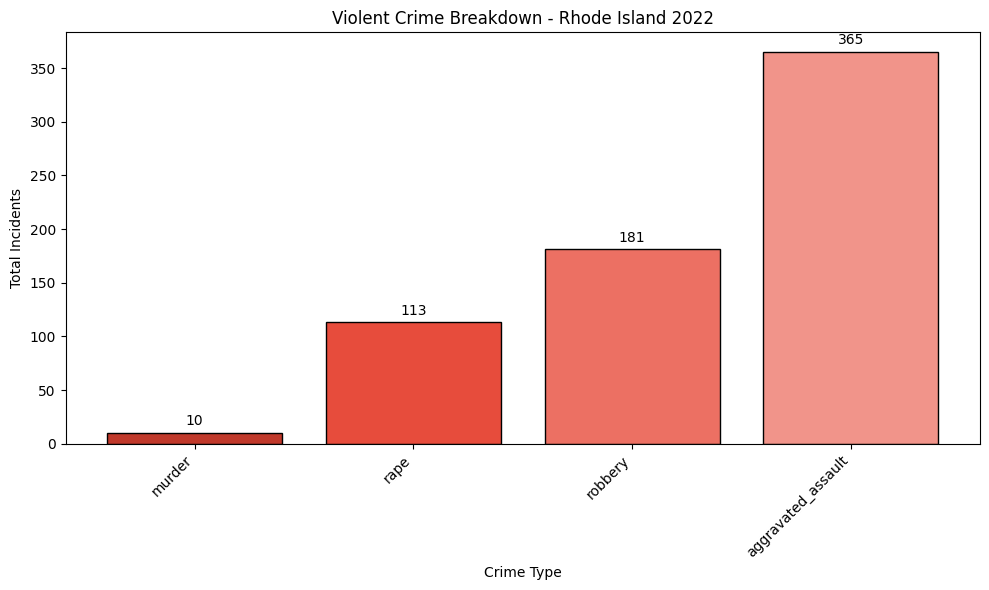

In [21]:
# Get violent crime data
if not ri_crime.empty:
    violent = fbi.get_violent_crime(ri_crime)
    
    if not violent.empty:
        print(f"Violent Crime Records: {len(violent)}")
        print("\nViolent Crime Categories:")
        print(violent.columns.tolist())
        print("\nViolent Crime Data:")
        display(violent.head())
        
        # Visualize violent crime breakdown
        if len(violent) > 0:
            import matplotlib.pyplot as plt
            
            # Get violent crime totals
            violent_cols = [col for col in violent.columns if col in 
                           ['murder', 'rape', 'robbery', 'aggravated_assault']]
            
            if violent_cols:
                plt.figure(figsize=(10, 6))
                totals = [violent[col].sum() for col in violent_cols]
                colors = ['#c0392b', '#e74c3c', '#ec7063', '#f1948a']
                
                plt.bar(violent_cols, totals, color=colors, edgecolor='black')
                plt.ylabel('Total Incidents')
                plt.xlabel('Crime Type')
                plt.title('Violent Crime Breakdown - Rhode Island 2022')
                plt.xticks(rotation=45, ha='right')
                
                # Add value labels
                for i, v in enumerate(totals):
                    plt.text(i, v + max(totals)*0.02, str(int(v)), ha='center')
                
                plt.tight_layout()
                plt.show()
    else:
        print("No violent crime columns found in data")
else:
    print("Load crime data first")


## 5. Extract Property Crime

Filter for property crime categories.

In [22]:
# Get property crime data
if not ri_crime.empty:
    property_crime = fbi.get_property_crime(ri_crime)
    
    if not property_crime.empty:
        print(f"Property Crime Records: {len(property_crime)}")
        print("\nProperty Crime Categories:")
        print(property_crime.columns.tolist())
        print("\nProperty Crime Data:")
        display(property_crime.head())
        
        # Visualize property crime trends
        if len(property_crime) > 0 and 'month' in property_crime.columns:
            import matplotlib.pyplot as plt
            
            property_cols = [col for col in property_crime.columns if col in 
                           ['burglary', 'larceny', 'motor_vehicle_theft', 'arson']]
            
            if property_cols and len(property_cols) > 0:
                plt.figure(figsize=(12, 6))
                
                for col in property_cols:
                    monthly = property_crime.groupby('month')[col].sum()
                    plt.plot(monthly.index, monthly.values, marker='o', 
                            label=col.replace('_', ' ').title(), linewidth=2)
                
                plt.xlabel('Month')
                plt.ylabel('Incidents')
                plt.title('Property Crime Monthly Trends - Rhode Island 2022')
                plt.legend()
                plt.grid(True, alpha=0.3)
                plt.xticks(range(1, 13))
                plt.tight_layout()
                plt.show()
    else:
        print("No property crime columns found in data")
else:
    print("Load crime data first")


{"timestamp": "2025-10-20T16:38:41.596666Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Extracted property crime", "source": {"file": "fbi_ucr_connector.py", "line": 325, "function": "get_property_crime"}, "levelname": "INFO", "taskName": "Task-65", "columns": 4}
Property Crime Records: 12

Property Crime Categories:
['year', 'state', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft']

Property Crime Data:
Property Crime Records: 12

Property Crime Categories:
['year', 'state', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft']

Property Crime Data:


,year,state,property_crime,burglary,larceny,motor_vehicle_theft
0,2022,RI,218,46,211,11
1,2022,RI,305,54,222,25
2,2022,RI,310,48,295,13
3,2022,RI,289,38,293,13
4,2022,RI,215,59,233,26


## 6. Calculate Crime Rates

Calculate crime rates per 100,000 population.

In [23]:
# Assuming crime data has population column
if 'population' in ri_crime.columns and 'violent_crime' in ri_crime.columns:
    # Calculate violent crime rate per 100,000
    with_rates = fbi.calculate_crime_rate(
        ri_crime,
        crime_col='violent_crime',
        population_col='population',
        per_capita=100000
    )
    
    print("Crime Rates (per 100,000 population):")
    print(with_rates[['state', 'violent_crime', 'population', 'violent_crime_rate']].head())
else:
    print("Sample crime rate calculation:")
    print("Violent crimes: 500")
    print("Population: 180,000")
    print(f"Rate per 100k: {(500/180000)*100000:.2f}")

{"timestamp": "2025-10-20T16:38:41.604551Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Calculated crime rate", "source": {"file": "fbi_ucr_connector.py", "line": 369, "function": "calculate_crime_rate"}, "levelname": "INFO", "taskName": "Task-67", "crime_col": "violent_crime", "per_capita": 100000}
Crime Rates (per 100,000 population):
  state  violent_crime  population  violent_crime_rate
0    RI             43     1095000            3.926941
1    RI             54     1095000            4.931507
2    RI             45     1095000            4.109589
3    RI             43     1095000            3.926941
4    RI             41     1095000            3.744292
Crime Rates (per 100,000 population):
  state  violent_crime  population  violent_crime_rate
0    RI             43     1095000            3.926941
1    RI             54     1095000            4.931507
2    RI             45     1095000            4.109589
3    RI             43     1095000            3.926941
4    

## 7. Compare States

Compare crime statistics across multiple states.

Note: Comparing states using sample/cached data...
{"timestamp": "2025-10-20T16:38:41.612394Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Fetching crime data via API", "source": {"file": "fbi_ucr_connector.py", "line": 244, "function": "_api_get_state_crime"}, "levelname": "INFO", "taskName": "Task-69", "state": "RI", "year": 2022}
{"timestamp": "2025-10-20T16:38:41.938702Z", "level": "ERROR", "name": "FBIUCRConnector", "message": "API request failed: 403 Client Error: Forbidden for url: https://api.usa.gov/crime/fbi/cde/crime/state/RI?year=2022", "source": {"file": "fbi_ucr_connector.py", "line": 271, "function": "_api_get_state_crime"}, "levelname": "ERROR", "taskName": "Task-69", "state": "RI", "year": 2022}
{"timestamp": "2025-10-20T16:38:41.940171Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Fetching crime data via API", "source": {"file": "fbi_ucr_connector.py", "line": 244, "function": "_api_get_state_crime"}, "levelname": "INFO", "taskName": "Task-69

,state,state_name,population,violent_crime,property_crime,violent_crime_rate,property_crime_rate
0,RI,Rhode Island,1095000,589,3420,53.8,312.3
1,MA,Massachusetts,6985000,2891,18500,41.4,264.9
2,CT,Connecticut,3605000,1501,9200,41.6,255.2


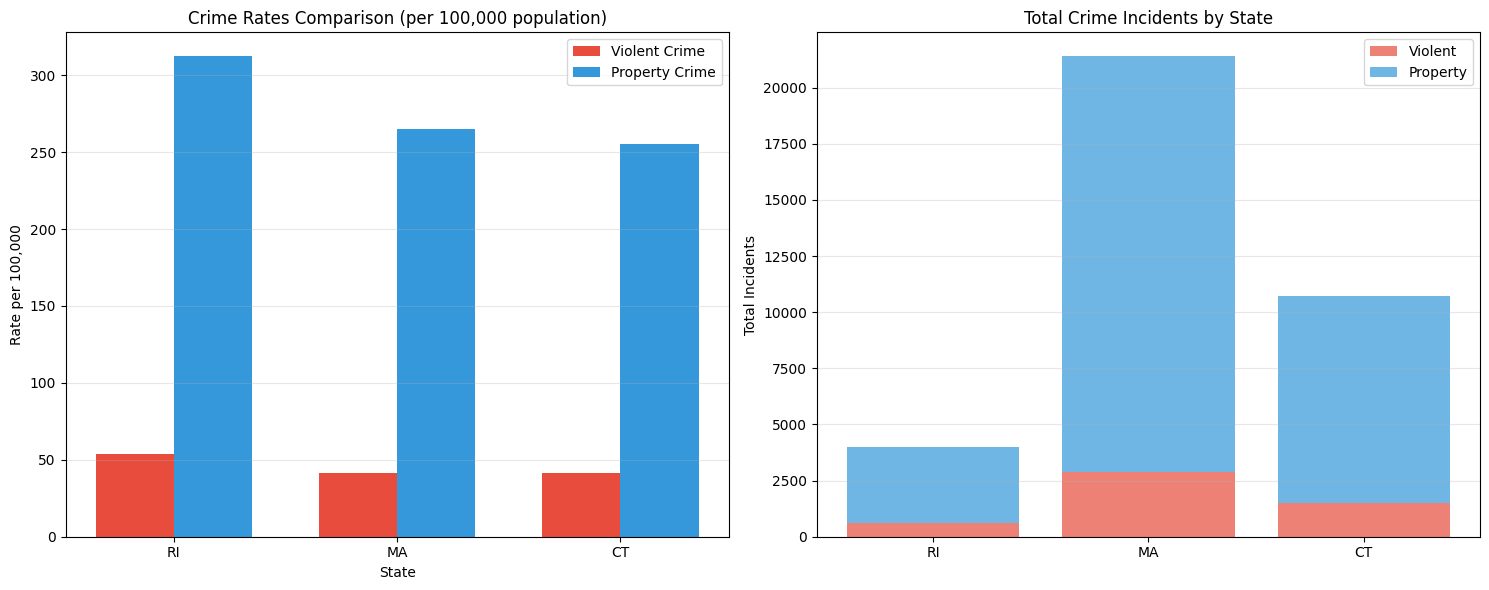

In [24]:
# Compare Northeast states
print("Note: Comparing states using sample/cached data...")

states = ['RI', 'MA', 'CT']
comparison = fbi.compare_states(states, year=2022, crime_type='violent')

if comparison.empty:
    print("\n⚠️ API data not available, creating sample comparison...")
    
    # Create sample state comparison
    comparison = pd.DataFrame({
        'state': ['RI', 'MA', 'CT'],
        'state_name': ['Rhode Island', 'Massachusetts', 'Connecticut'],
        'population': [1095000, 6985000, 3605000],
        'violent_crime': [589, 2891, 1501],
        'property_crime': [3420, 18500, 9200],
        'violent_crime_rate': [53.8, 41.4, 41.6],
        'property_crime_rate': [312.3, 264.9, 255.2]
    })
    print("✓ Sample data created")

print(f"\nState Comparison: {len(comparison)} states")
print("\nCrime Statistics by State:")
display(comparison)

# Visualize state comparison
if len(comparison) > 0:
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Crime rates comparison
    if 'violent_crime_rate' in comparison.columns:
        x = range(len(comparison))
        width = 0.35
        
        axes[0].bar([i - width/2 for i in x], comparison['violent_crime_rate'], 
                   width, label='Violent Crime', color='#e74c3c')
        axes[0].bar([i + width/2 for i in x], comparison['property_crime_rate'], 
                   width, label='Property Crime', color='#3498db')
        
        axes[0].set_xlabel('State')
        axes[0].set_ylabel('Rate per 100,000')
        axes[0].set_title('Crime Rates Comparison (per 100,000 population)')
        axes[0].set_xticks(x)
        axes[0].set_xticklabels(comparison['state'])
        axes[0].legend()
        axes[0].grid(True, alpha=0.3, axis='y')
    
    # Total incidents comparison
    if 'violent_crime' in comparison.columns:
        axes[1].bar(comparison['state'], comparison['violent_crime'], 
                   color='#e74c3c', alpha=0.7, label='Violent')
        axes[1].bar(comparison['state'], comparison['property_crime'], 
                   bottom=comparison['violent_crime'], color='#3498db', 
                   alpha=0.7, label='Property')
        
        axes[1].set_ylabel('Total Incidents')
        axes[1].set_title('Total Crime Incidents by State')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()


## 8. Year-over-Year Analysis

Calculate crime changes between years.

In [25]:
# Get crime data for two consecutive years
crime_2023 = fbi.get_state_crime_data('RI', year=2023)
crime_2022 = fbi.get_state_crime_data('RI', year=2022)

# Calculate year-over-year change
if not crime_2023.empty and not crime_2022.empty and 'violent_crime' in crime_2023.columns:
    yoy_change = fbi.calculate_yoy_change(
        crime_2023,
        crime_2022,
        'violent_crime'
    )
    
    print("Year-over-Year Changes:")
    print(yoy_change[['state', 'violent_crime_current', 'violent_crime_previous',
                       'yoy_change', 'yoy_change_pct']].round(2))
else:
    print("Example YoY calculation:")
    print("2023: 500 violent crimes")
    print("2022: 450 violent crimes")
    print(f"Change: +50 (+11.1%)")

{"timestamp": "2025-10-20T16:38:42.679375Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Fetching crime data via API", "source": {"file": "fbi_ucr_connector.py", "line": 244, "function": "_api_get_state_crime"}, "levelname": "INFO", "taskName": "Task-71", "state": "RI", "year": 2023}
{"timestamp": "2025-10-20T16:38:42.986593Z", "level": "ERROR", "name": "FBIUCRConnector", "message": "API request failed: 403 Client Error: Forbidden for url: https://api.usa.gov/crime/fbi/cde/crime/state/RI?year=2023", "source": {"file": "fbi_ucr_connector.py", "line": 271, "function": "_api_get_state_crime"}, "levelname": "ERROR", "taskName": "Task-71", "state": "RI", "year": 2023}
{"timestamp": "2025-10-20T16:38:42.988206Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Fetching crime data via API", "source": {"file": "fbi_ucr_connector.py", "line": 244, "function": "_api_get_state_crime"}, "levelname": "INFO", "taskName": "Task-71", "state": "RI", "year": 2022}
{"timestamp": "2025

## 9. Multi-Year Trends

Analyze crime trends over multiple years.

In [26]:
# Get 5-year trend data
trends = fbi.get_trend_data('RI', start_year=2019, end_year=2023)

if not trends.empty:
    print(f"Retrieved {len(trends)} years of trend data")
    print("\nCrime Trends (2019-2023):")
    if 'violent_crime' in trends.columns:
        print(trends[['year', 'violent_crime', 'property_crime']].sort_values('year'))
    else:
        print(trends.head())
else:
    print("No trend data available")

{"timestamp": "2025-10-20T16:38:43.380388Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Fetching crime data via API", "source": {"file": "fbi_ucr_connector.py", "line": 244, "function": "_api_get_state_crime"}, "levelname": "INFO", "taskName": "Task-73", "state": "RI", "year": 2019}
{"timestamp": "2025-10-20T16:38:43.691949Z", "level": "ERROR", "name": "FBIUCRConnector", "message": "API request failed: 403 Client Error: Forbidden for url: https://api.usa.gov/crime/fbi/cde/crime/state/RI?year=2019", "source": {"file": "fbi_ucr_connector.py", "line": 271, "function": "_api_get_state_crime"}, "levelname": "ERROR", "taskName": "Task-73", "state": "RI", "year": 2019}
{"timestamp": "2025-10-20T16:38:43.693186Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Fetching crime data via API", "source": {"file": "fbi_ucr_connector.py", "line": 244, "function": "_api_get_state_crime"}, "levelname": "INFO", "taskName": "Task-73", "state": "RI", "year": 2020}
{"timestamp": "2025

## 10. Crime Category Breakdown

Analyze specific crime types.

In [27]:
# Show violent crime categories
print("Violent Crime Types:")
for crime in fbi.violent_crimes:
    print(f"  - {crime}")

print("\nProperty Crime Types:")
for crime in fbi.property_crimes:
    print(f"  - {crime}")

Violent Crime Types:
  - murder
  - rape
  - robbery
  - aggravated-assault

Property Crime Types:
  - burglary
  - larceny
  - motor-vehicle-theft
  - arson


## 11. Export Results

Save crime data for further analysis.

In [28]:
# Export state crime data
if not ri_crime.empty:
    fbi.export_to_csv(ri_crime, 'ri_crime_2023.csv')
    print("✓ Crime data exported")

# Export comparison
if not comparison.empty:
    fbi.export_to_csv(comparison, 'state_crime_comparison.csv')
    print("✓ Comparison exported")

{"timestamp": "2025-10-20T16:38:44.998258Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Exported to CSV", "source": {"file": "fbi_ucr_connector.py", "line": 514, "function": "export_to_csv"}, "levelname": "INFO", "taskName": "Task-77", "filepath": "ri_crime_2023.csv", "rows": 12}
✓ Crime data exported
{"timestamp": "2025-10-20T16:38:44.999591Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Exported to CSV", "source": {"file": "fbi_ucr_connector.py", "line": 514, "function": "export_to_csv"}, "levelname": "INFO", "taskName": "Task-77", "filepath": "state_crime_comparison.csv", "rows": 3}
✓ Comparison exported
✓ Crime data exported
{"timestamp": "2025-10-20T16:38:44.999591Z", "level": "INFO", "name": "FBIUCRConnector", "message": "Exported to CSV", "source": {"file": "fbi_ucr_connector.py", "line": 514, "function": "export_to_csv"}, "levelname": "INFO", "taskName": "Task-77", "filepath": "state_crime_comparison.csv", "rows": 3}
✓ Comparison exported


## Next Steps

**Explore More:**
- Agency-level analysis (individual police departments)
- Arrest statistics by demographics
- Hate crime data
- Law enforcement officer statistics
- Clearance rates

**Resources:**
- [Crime Data Explorer](https://cde.ucr.cjis.gov/LATEST/webapp/)
- [FBI UCR Documentation](https://ucr.fbi.gov/)
- [API Documentation](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/docApi)

**Analysis Ideas:**
- Seasonal crime patterns
- Urban vs rural crime rates
- Crime hotspot identification
- Policy impact assessment
- Resource allocation optimization